In [1]:
import IPython
!pip install -q tf-keras-vis tensorflow-addons
IPython.display.clear_output(wait=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 657.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


2025-07-19 15:29:45.769192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752938985.956301      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752938986.012862      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--- Part 1: Model Training, Saving, and Initial Evaluation ---
Setting up data generators...
Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Creating VGG16 model...


I0000 00:00:1752939003.701140      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Model summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Training model for 64 epochs...
Epoch 1/64


I0000 00:00:1752939012.234485      87 service.cc:148] XLA service 0x7d116400f2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752939012.235400      87 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752939012.683550      87 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/131 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.5000 - loss: 2.3957  

I0000 00:00:1752939020.976375      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 129s 908ms/step - accuracy: 0.8100 - loss: 0.6091 - val_accuracy: 0.9204 - val_loss: 0.1887 - learning_rate: 0.0010
Epoch 2/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 675ms/step - accuracy: 0.9152 - loss: 0.2199 - val_accuracy: 0.9386 - val_loss: 0.1539 - learning_rate: 0.0010
Epoch 3/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 671ms/step - accuracy: 0.9325 - loss: 0.1805 - val_accuracy: 0.9377 - val_loss: 0.1469 - learning_rate: 0.0010
Epoch 4/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 668ms/step - accuracy: 0.9372 - loss: 0.1647 - val_accuracy: 0.9396 - val_loss: 0.1346 - learning_rate: 0.0010
Epoch 5/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 676ms/step - accuracy: 0.9407 - loss: 0.1551 - val_accuracy: 0.9444 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 6/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 673ms/step - accuracy: 0.9363 - loss: 0.1511 - val_accuracy: 0.9406 - val_loss: 0.1437 - learning_rate: 0.0010
Epoch 7/64
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 691ms/step - accuracy: 0.9392 - loss

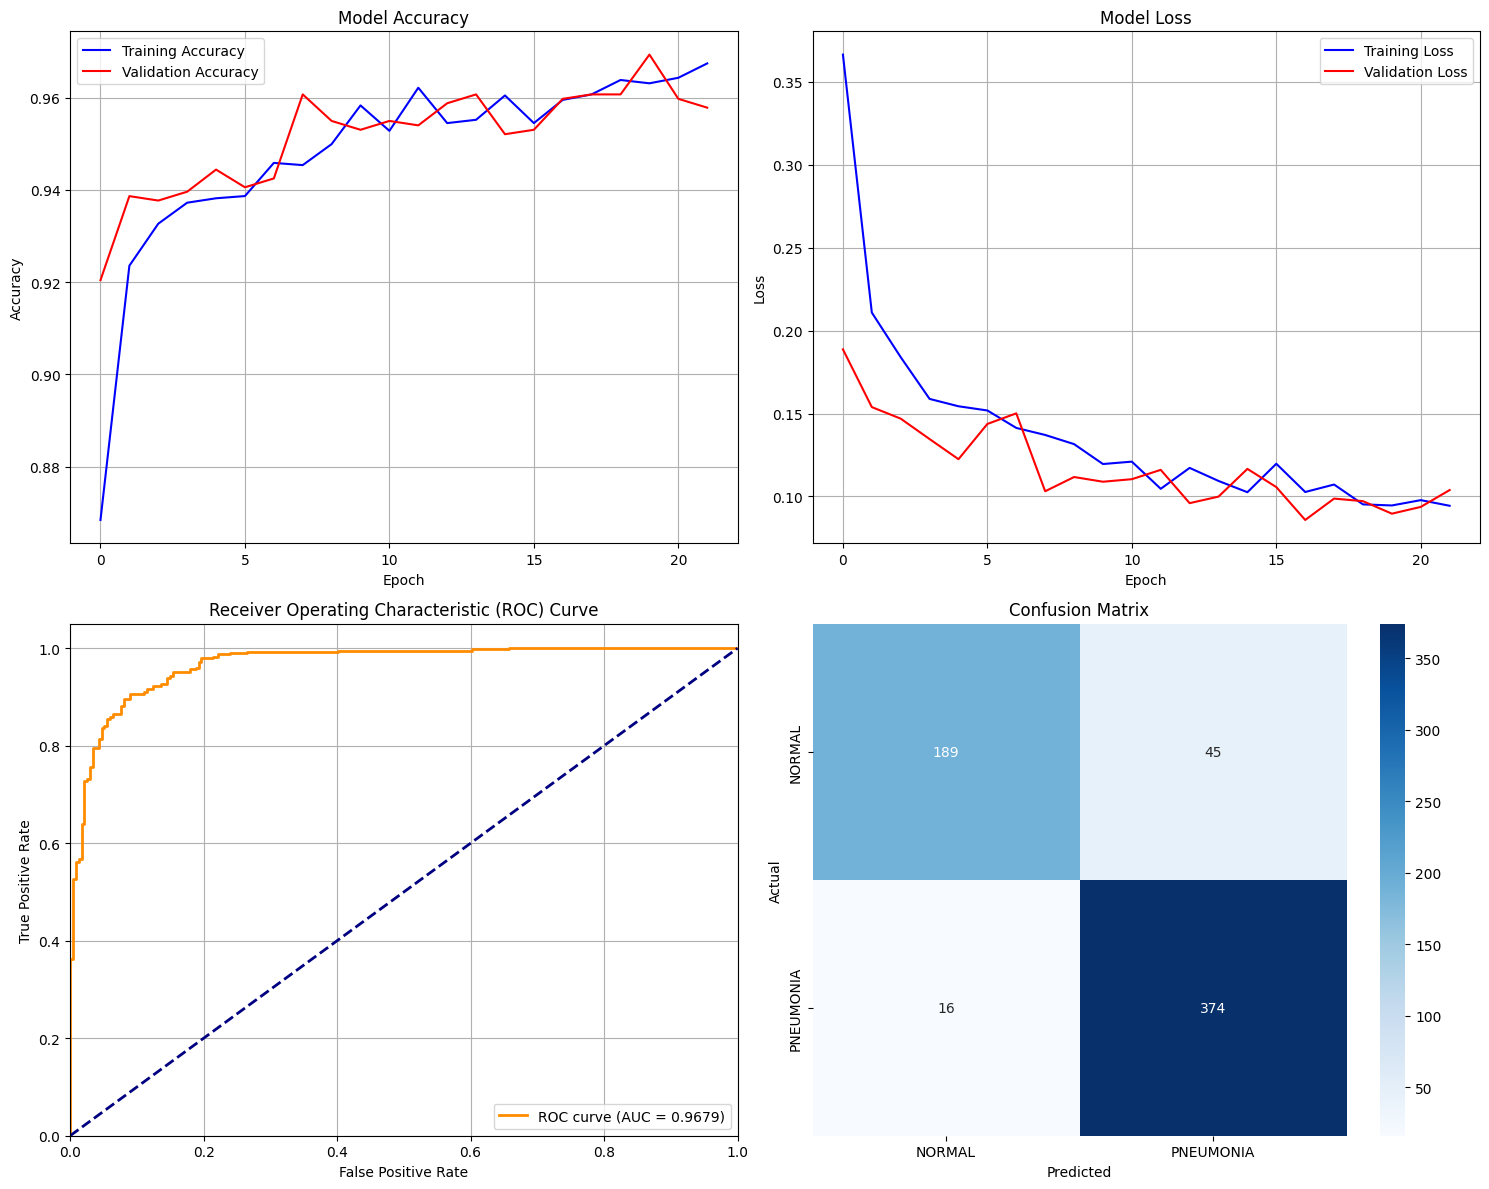


Part 1: Complete.


In [2]:
# Part 1: Model Training, Saving, and Initial Evaluation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings

warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

# Define dataset paths (adjust these if running locally)
train_dir = "/kaggle/input/chestxraydataset/chest_xray/train"
test_dir = "/kaggle/input/chestxraydataset/chest_xray/test"

# Model and training parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 64 # Keeping epochs low for demonstration; increase for better performance
MODEL_SAVE_PATH = "chest_xray_vgg16_model.keras" # Recommended .keras extension

def create_model():
    """
    Creates a VGG16-based CNN model for binary classification.
    The base VGG16 model is loaded with ImageNet weights and its layers are frozen.
    Custom classification layers are added on top.
    """
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    
    # Freeze the convolutional base to prevent weights from being updated during initial training
    base_model.trainable = False
    
    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x) # Reduces spatial dimensions to a single feature vector
    x = Dense(128, activation='relu')(x) # Fully connected layer with ReLU activation
    x = Dropout(0.5)(x) # Dropout for regularization
    predictions = Dense(1, activation='sigmoid')(x) # Output layer for binary classification (Pneumonia/Normal)
    
    # Construct the full model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

def setup_data_generators():
    """
    Sets up ImageDataGenerators for training, validation, and testing.
    Includes data augmentation for the training set and preprocessing for all sets.
    """
    # Data augmentation and preprocessing for training data
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input, # VGG16 specific preprocessing
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2,
        validation_split=0.2 # Use 20% of training data for validation
    )
    
    # Only preprocessing for test data (no augmentation)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    # Training data generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary', # For binary classification (0 or 1)
        subset='training',
        shuffle=True
    )
    
    # Validation data generator
    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation',
        shuffle=False # Do not shuffle validation data for consistent evaluation
    )
    
    # Test data generator
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False # Do not shuffle test data for consistent evaluation
    )
    
    return train_generator, validation_generator, test_generator

def plot_combined_metrics(history, y_true, y_pred, y_pred_proba, class_names, cm):
    """
    Plots training history (accuracy and loss), ROC curve, and Confusion Matrix
    in a 2x2 grid for comprehensive evaluation visualization.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Plot 2: Loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss', color='blue')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', color='red')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Plot 3: ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
    axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, 0].set_xlim([0.0, 1.0])
    axes[1, 0].set_ylim([0.0, 1.05])
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1, 0].legend(loc="lower right")
    axes[1, 0].grid(True)
    
    # Plot 4: Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
    axes[1, 1].set_title('Confusion Matrix')
    axes[1, 1].set_xlabel('Predicted')
    axes[1, 1].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

def main_part1():
    print("--- Part 1: Model Training, Saving, and Initial Evaluation ---")
    
    print("Setting up data generators...")
    train_gen, val_gen, test_gen = setup_data_generators()
    
    class_names = list(train_gen.class_indices.keys())
    print("Class indices:", train_gen.class_indices)
    
    print("Creating VGG16 model...")
    model = create_model()
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    print("Model summary:")
    model.summary()
    
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True), # Stop if no improvement for 5 epochs
        ReduceLROnPlateau(patience=3, factor=0.5, verbose=1) # Reduce LR if validation loss plateaus
    ]
    
    print(f"Training model for {EPOCHS} epochs...")
    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )
    
    print(f"\nSaving the trained model to {MODEL_SAVE_PATH}...")
    model.save(MODEL_SAVE_PATH)
    print("Model saved successfully.")
    
    print("\n--- Model Evaluation on Test Set ---")
    test_gen.reset() # Reset generator to ensure fresh pass
    predictions = model.predict(test_gen, verbose=1)
    y_pred_proba = predictions.flatten()
    y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions
    y_true = test_gen.labels # Get true labels from the generator
    
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
    
    print("\n--- Displaying Combined Metrics (Accuracy, Loss, ROC, Confusion Matrix) ---")
    cm = confusion_matrix(y_true, y_pred) # Calculate confusion matrix
    plot_combined_metrics(history, y_true, y_pred, y_pred_proba, class_names, cm)
    
    print("\nPart 1: Complete.")

if __name__ == "__main__":
    main_part1()

--- Part 2: Feature Map Visualization ---
Loading trained model from chest_xray_vgg16_model.keras...
Model loaded successfully.

--- Preparing image for visualization: person1001_bacteria_2932.jpeg ---

--- Visualizing Feature Maps for All Convolutional Layers in Order ---


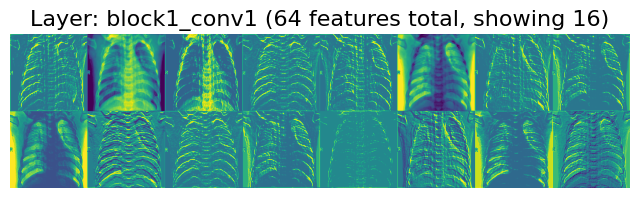

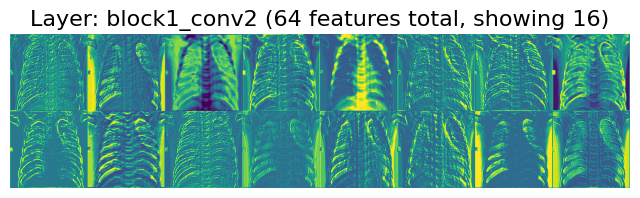

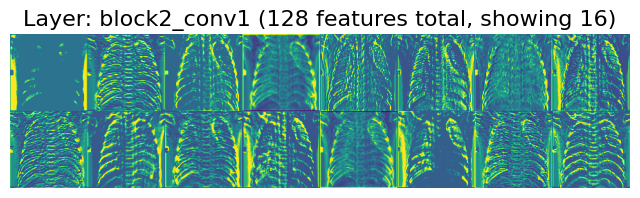

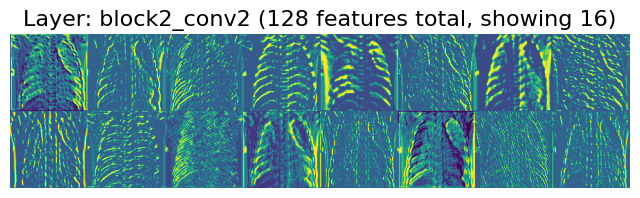

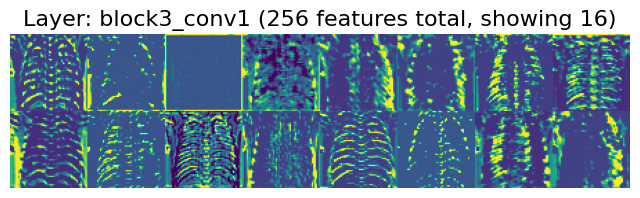

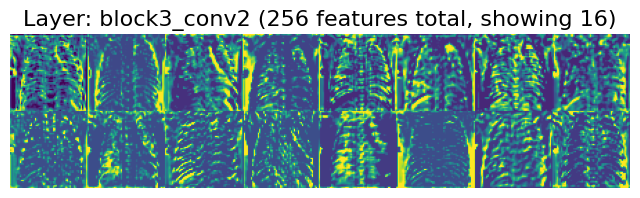

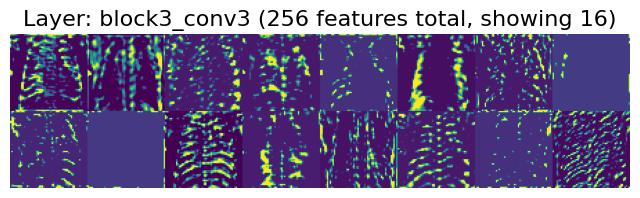

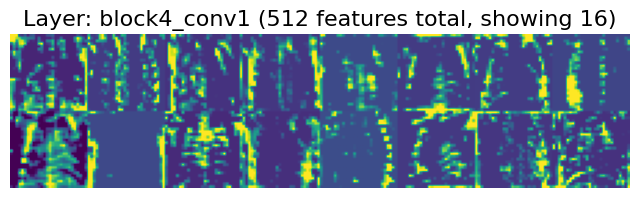

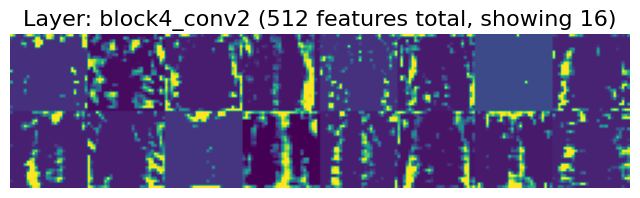

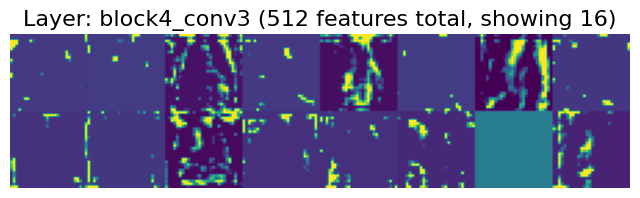

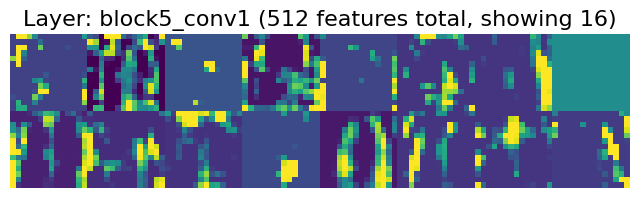

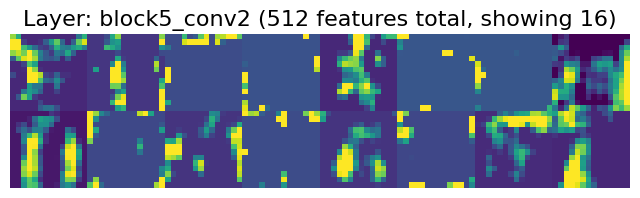

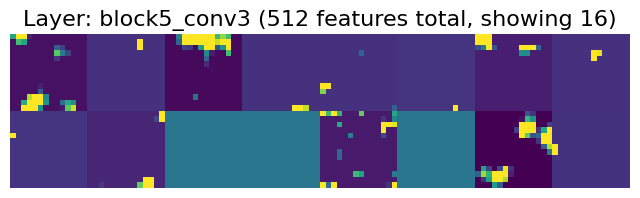


Part 2: Complete.


In [3]:
# Part 2: Feature Map Visualization (All Convolutional Layers)
# https://www.kaggle.com/code/rambierestelle/unfolding-cnn-layers-visuals-and-shap
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import warnings

warnings.filterwarnings('ignore')

# --- Configuration (must match Part 1) ---
IMG_SIZE = (224, 224)
MODEL_SAVE_PATH = "chest_xray_vgg16_model.keras" # Path to the saved model from Part 1

# Define dataset paths (adjust these if running locally)
train_dir = "/kaggle/input/chestxraydataset/chest_xray/train"
test_dir = "/kaggle/input/chestxraydataset/chest_xray/test"

def visualize_feature_maps(model, img_array, num_features_per_layer=16):
    """
    Visualizes feature maps from all convolutional layers of the model, in their network order.

    Args:
        model (tf.keras.Model): The loaded CNN model.
        img_array (np.array): Preprocessed image array (batch of 1).
        num_features_per_layer (int): Number of feature maps to display for each layer.
    """
    print("\n--- Visualizing Feature Maps for All Convolutional Layers in Order ---")

    layer_outputs = []
    layer_names_to_plot = []

    # Iterate through all layers in the model to find Conv2D layers
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            layer_outputs.append(layer.output)
            layer_names_to_plot.append(layer.name)
    
    if not layer_names_to_plot:
        print("No Conv2D layers found in the model to visualize.")
        return
            
    # Create a new model that outputs the activations of all identified Conv2D layers
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    
    # Run model in predict mode to get activations
    activations = activation_model.predict(img_array, verbose=0)
    
    # Ensure activations is a list (important if only one layer is found)
    if not isinstance(activations, list):
        activations = [activations]

    for layer_name, layer_activation in zip(layer_names_to_plot, activations):
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] # The feature map has shape (1, size, size, n_features).
        
        # Determine how many features to display for this layer
        features_to_display = min(n_features, num_features_per_layer)
        
        # Calculate grid dimensions: dynamically adjust rows/cols based on features_to_display
        images_per_row = 8 # Keep a reasonable number of images per row for readability
        n_cols = (features_to_display + images_per_row - 1) // images_per_row # Ceiling division for rows
        
        if features_to_display == 0:
            print(f"Layer {layer_name} has no features to display.")
            continue

        # Create a grid to display the feature maps
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col_idx in range(n_cols):
            for row_idx in range(images_per_row):
                feature_idx = col_idx * images_per_row + row_idx
                if feature_idx < features_to_display: # Ensure we don't go out of bounds
                    channel_image = layer_activation[0, :, :, feature_idx] # Take the first image in batch
                    
                    # Post-process the feature to make it visually palatable
                    # Handle division by zero for std_dev
                    std_dev = channel_image.std()
                    if std_dev != 0:
                        channel_image -= channel_image.mean()
                        channel_image /= std_dev
                    else:
                        # If std_dev is zero, the channel is flat. Set to a neutral value (e.g., mid-gray).
                        channel_image = np.zeros_like(channel_image) + 0.5 
                        
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    
                    # Place the processed channel image into the display grid
                    display_grid[col_idx * size : (col_idx + 1) * size,
                                 row_idx * size : (row_idx + 1) * size] = channel_image
                else:
                    break # No more features for this layer to display in this row
        
        # Plot the display grid for the current layer
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(f'Layer: {layer_name} ({n_features} features total, showing {features_to_display})', fontsize=16)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis') # Use 'viridis' colormap
        plt.axis('off') # Turn off axes for cleaner visualization
        plt.show()

def main_part2():
    print("--- Part 2: Feature Map Visualization ---")
    
    if not os.path.exists(MODEL_SAVE_PATH):
        print(f"Error: Model not found at {MODEL_SAVE_PATH}. Please run Part 1 first.")
        return
        
    print(f"Loading trained model from {MODEL_SAVE_PATH}...")
    model = load_model(MODEL_SAVE_PATH)
    print("Model loaded successfully.")

    # --- Prepare a sample image for visualization ---
    # We'll pick one pneumonia sample for detailed feature map visualization
    sample_image_path = os.path.join(train_dir, "PNEUMONIA", "person1001_bacteria_2932.jpeg")

    if not os.path.exists(sample_image_path):
        print(f"Warning: Sample image not found at {sample_image_path}. Skipping feature map visualization.")
        return
            
    print(f"\n--- Preparing image for visualization: {os.path.basename(sample_image_path)} ---")
    img_raw = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=IMG_SIZE)
    img_array_raw = tf.keras.preprocessing.image.img_to_array(img_raw)
    preprocessed_img = preprocess_input(np.expand_dims(img_array_raw, axis=0).copy()) # Batch of 1
    
    # Visualize feature maps for this image across all convolutional layers
    visualize_feature_maps(model, preprocessed_img)
    
    print("\nPart 2: Complete.")

if __name__ == "__main__":
    main_part2()

--- Part 3: Advanced CAM Visualizations (Eigen-CAM Removed) ---
Loading trained model from chest_xray_vgg16_model.keras...
Model loaded successfully.
Detected class order: ['NORMAL', 'PNEUMONIA']

--- Preparing image for CAM visualization: person1001_bacteria_2932.jpeg (Note: This sample is from the training set, often used for SHAP/CAM analysis.) ---
True Class: PNEUMONIA
Predicted Probability (Pneumonia): 0.1866
Predicted Class: NORMAL
Using 'block5_conv3' as the target convolutional layer for CAMs.

Generating Grad-CAM heatmap...
Generating Grad-CAM++ heatmap...
Generating Score-CAM heatmap...
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


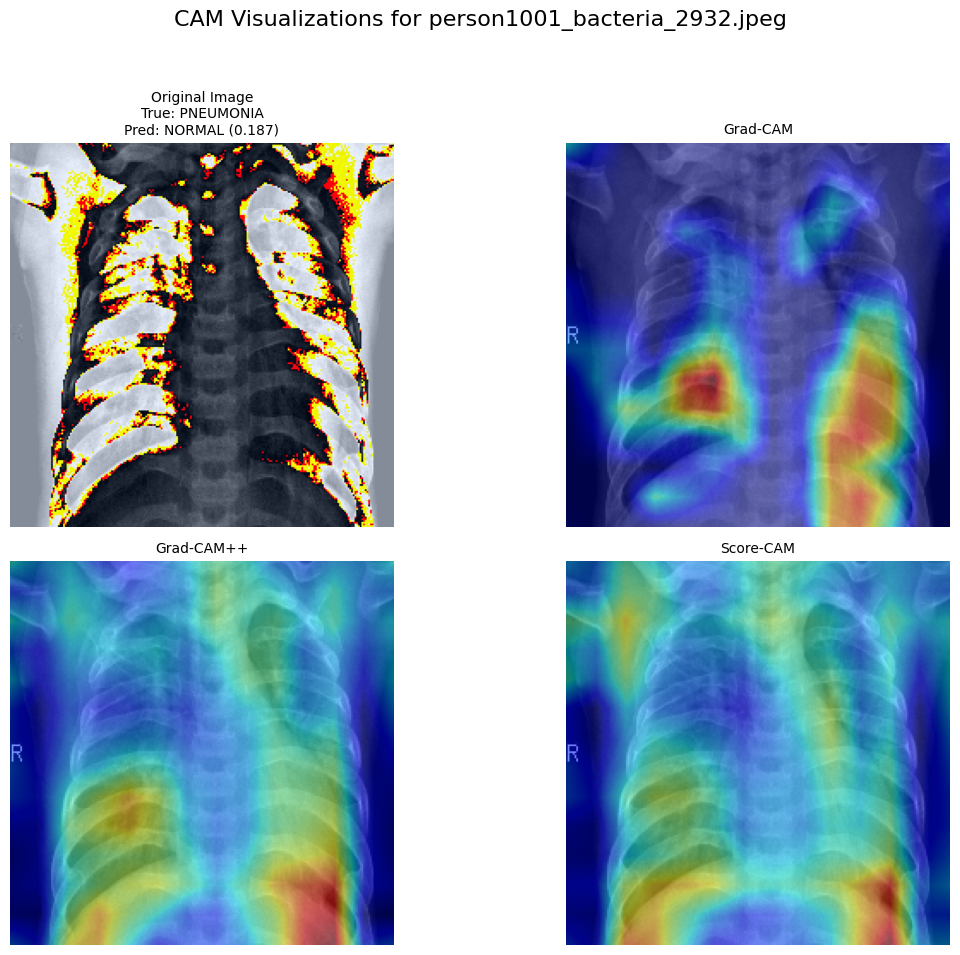


Part 3: Complete.


In [4]:
# Part 3: Advanced CAM Visualizations 
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Import CAM methods from tf_keras_vis
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import BinaryScore # For binary classification

import warnings
warnings.filterwarnings('ignore')

# --- Configuration (must match Part 1) ---
IMG_SIZE = (224, 224)
MODEL_SAVE_PATH = "chest_xray_vgg16_model.keras" # Path to the saved model from Part 1

# Define dataset paths (adjust these if running locally)
train_dir = "/kaggle/input/chestxraydataset/chest_xray/train"
test_dir = "/kaggle/input/chestxraydataset/chest_xray/test" # Used for sample image

# --- Helper Functions for tf_keras_vis ---

def find_last_conv_layer(model):
    """
    Finds the name of the last convolutional layer in the model.
    This layer is typically used for CAM methods.
    """
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

# Define a score function for tf_keras_vis
# For binary classification, we are interested in the positive class (Pneumonia)
# which corresponds to the single output neuron (index 0) of the sigmoid layer.
def score_function_for_cam(output):
    # output shape will be (batch_size, 1) for binary classification
    # We want to maximize the output for the positive class (pneumonia)
    return output[:, 0] # Return the raw output for the single neuron

def main_part3():
    print("--- Part 3: Advanced CAM Visualizations (Eigen-CAM Removed) ---")
    
    if not os.path.exists(MODEL_SAVE_PATH):
        print(f"Error: Model not found at {MODEL_SAVE_PATH}. Please run Part 1 first.")
        return
        
    print(f"Loading trained model from {MODEL_SAVE_PATH}...")
    model = load_model(MODEL_SAVE_PATH)
    print("Model loaded successfully.")

    # Get class names (assuming 'NORMAL', 'PNEUMONIA' based on dataset structure)
    class_names = ['NORMAL', 'PNEUMONIA']
    print("Detected class order:", class_names)

    # --- Prepare a sample image for visualization ---
    # Using the specified image path for SHAP/CAM visualization
    sample_image_path = "/kaggle/input/chestxraydataset/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg"
    print(f"\n--- Preparing image for CAM visualization: {os.path.basename(sample_image_path)} (Note: This sample is from the training set, often used for SHAP/CAM analysis.) ---")
    
    if not os.path.exists(sample_image_path):
        print(f"Error: Specified sample image not found at {sample_image_path}. Please ensure the path is correct.")
        return

    img_raw = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=IMG_SIZE)
    img_array_raw = tf.keras.preprocessing.image.img_to_array(img_raw)
    # Expand dims to create a batch of 1, and preprocess for VGG16
    input_image = preprocess_input(np.expand_dims(img_array_raw, axis=0))

    # Predict with the model
    prediction_prob = model.predict(input_image, verbose=0)[0][0]
    predicted_class_idx = int(prediction_prob > 0.5)
    predicted_class_name = class_names[predicted_class_idx]
    
    # Determine the true class name from the path
    true_class_name = os.path.basename(os.path.dirname(sample_image_path))

    print(f"True Class: {true_class_name}")
    print(f"Predicted Probability (Pneumonia): {prediction_prob:.4f}")
    print(f"Predicted Class: {predicted_class_name}")

    # Find the last convolutional layer dynamically
    try:
        last_conv_layer_name = find_last_conv_layer(model)
        print(f"Using '{last_conv_layer_name}' as the target convolutional layer for CAMs.")
    except ValueError as e:
        print(f"Error: {e}")
        return

    # Prepare for visualization
    def plot_cam_heatmap(heatmap, original_image, title, ax):
        # Normalize original image for display (0-1 range)
        display_img = original_image.copy()
        display_img = (display_img - display_img.min()) / (display_img.max() - display_img.min() + 1e-8) # Add epsilon
        
        ax.imshow(display_img)
        # Overlay the heatmap
        ax.imshow(heatmap, cmap='jet', alpha=0.5)
        ax.set_title(title, fontsize=10)
        ax.axis('off')

    # Create a figure to display all CAMs in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten() # Flatten the array for easy iteration

    # --- Original Image ---
    axes[0].imshow(img_array_raw.astype('uint8')) # Display original raw image
    axes[0].set_title(f"Original Image\nTrue: {true_class_name}\nPred: {predicted_class_name} ({prediction_prob:.3f})", fontsize=10)
    axes[0].axis('off')
    
    cam_index = 1 # Start plotting CAMs from the second subplot

    # --- Grad-CAM ---
    print("\nGenerating Grad-CAM heatmap...")
    gradcam = Gradcam(model, 
                      model_modifier=ReplaceToLinear(), 
                      clone=True)
    gradcam_heatmap = gradcam(score_function_for_cam, # Use the custom score function
                              input_image, 
                              penultimate_layer=last_conv_layer_name)
    plot_cam_heatmap(gradcam_heatmap[0], img_array_raw, "Grad-CAM", axes[cam_index])
    cam_index += 1

    # --- Grad-CAM++ ---
    print("Generating Grad-CAM++ heatmap...")
    gradcam_pp = GradcamPlusPlus(model, 
                                 model_modifier=ReplaceToLinear(), 
                                 clone=True)
    gradcam_pp_heatmap = gradcam_pp(score_function_for_cam, 
                                     input_image, 
                                     penultimate_layer=last_conv_layer_name)
    plot_cam_heatmap(gradcam_pp_heatmap[0], img_array_raw, "Grad-CAM++", axes[cam_index])
    cam_index += 1

    # --- Score-CAM ---
    print("Generating Score-CAM heatmap...")
    scorecam = Scorecam(model, 
                        model_modifier=ReplaceToLinear(), 
                        clone=True)
    scorecam_heatmap = scorecam(score_function_for_cam, 
                                input_image, 
                                penultimate_layer=last_conv_layer_name)
    plot_cam_heatmap(scorecam_heatmap[0], img_array_raw, "Score-CAM", axes[cam_index])
    cam_index += 1
    
    # Hide any unused subplots (though for 2x2 and 4 plots, there shouldn't be any now)
    for i in range(cam_index, len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle(f"CAM Visualizations for {os.path.basename(sample_image_path)}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()
    
    print("\nPart 3: Complete.")

if __name__ == "__main__":
    main_part3()